In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from warnings import filterwarnings
filterwarnings ('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc,accuracy_score,confusion_matrix,auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from keras.models import Sequential
from keras.layers import Dense
import xgboost as xgb


In [6]:
# Load the dataset
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')


In [7]:
print("The first five rows of datasets")
train.head()

The first five rows of datasets


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,21740,30,admin.,married,secondary,no,4,no,no,unknown,7,may,172,8,-1,0,unknown,0
1,22648,32,technician,single,secondary,no,116,yes,no,cellular,20,aug,718,2,-1,0,unknown,1
2,31793,56,housemaid,married,primary,no,82,no,no,unknown,16,may,215,1,-1,0,unknown,0
3,21439,25,services,single,secondary,no,333,no,yes,cellular,15,jul,1056,2,-1,0,unknown,1
4,70323,38,services,married,secondary,no,393,no,no,unknown,18,jun,90,3,-1,0,unknown,0


In [8]:
print("Banking Marketing Effectiveness dataset-rows:",train.shape[0],'cloumns:',train.shape[1])
train.isnull().sum()

Banking Marketing Effectiveness dataset-rows: 31647 cloumns: 18


id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [9]:
train.duplicated().sum() # to know the duplicates in the data

0

In [10]:
print("Banking Marketing Effectiveness dataset-rows:",test.shape[0],'cloumns:',test.shape[1])
test.isnull().sum()

Banking Marketing Effectiveness dataset-rows: 9042 cloumns: 17


id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [11]:
test.duplicated().sum() # to know the duplicates in the data

0

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,31647.0,50089.981452,28796.401090,1.0,25064.0,50203.0,74947.5,99997.0
age,31647.0,40.938509,10.619933,18.0,33.0,39.0,48.0,95.0
balance,31647.0,1366.769267,3105.739729,-4057.0,71.0,451.0,1414.0,98417.0
day,31647.0,15.813884,8.312928,1.0,8.0,16.0,21.0,31.0
duration,31647.0,260.069517,259.175306,0.0,103.0,181.0,322.0,4918.0
campaign,31647.0,2.758777,3.084828,1.0,1.0,2.0,3.0,63.0
pdays,31647.0,40.669732,100.961218,-1.0,-1.0,-1.0,-1.0,871.0
previous,31647.0,0.576927,1.947053,0.0,0.0,0.0,0.0,58.0
Target,31647.0,0.118400,0.323086,0.0,0.0,0.0,0.0,1.0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31647 non-null  int64 
 1   age        31647 non-null  int64 
 2   job        31647 non-null  object
 3   marital    31647 non-null  object
 4   education  31647 non-null  object
 5   default    31647 non-null  object
 6   balance    31647 non-null  int64 
 7   housing    31647 non-null  object
 8   loan       31647 non-null  object
 9   contact    31647 non-null  object
 10  day        31647 non-null  int64 
 11  month      31647 non-null  object
 12  duration   31647 non-null  int64 
 13  campaign   31647 non-null  int64 
 14  pdays      31647 non-null  int64 
 15  previous   31647 non-null  int64 
 16  poutcome   31647 non-null  object
 17  Target     31647 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 4.3+ MB


## Visualization


##### Key Takeaways:
Age Distribution: The median age for both subscribed (1) and non-subscribed (0) individuals is around 40 years.

Interquartile Range (IQR): Most individuals fall between 30–50 years, suggesting a similar age trend for both groups.

Outliers: Some individuals above 70 years may be anomalies or special cases.
##### Insights:
If targeting subscribers, age doesn’t seem like a strong differentiator.

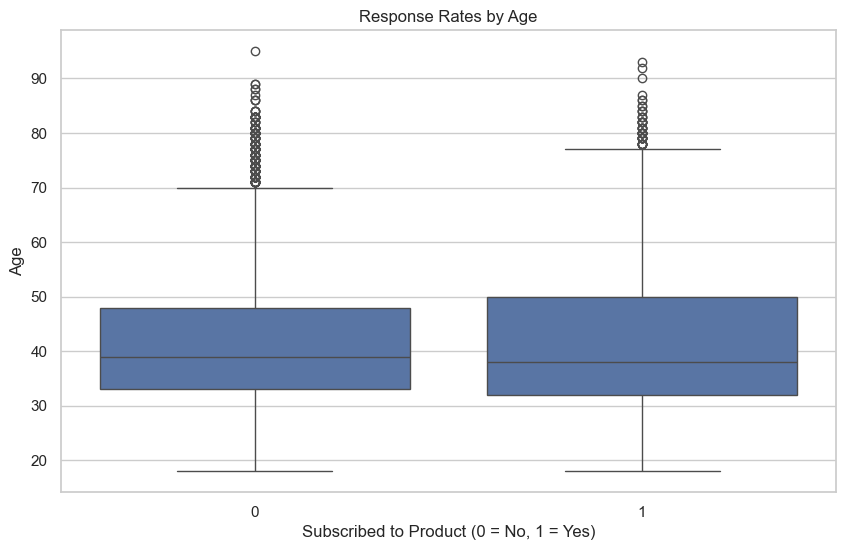

In [16]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Customer Demographics & Behavior
# Age vs Response Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='age', data=train)
plt.title('Response Rates by Age')
plt.xlabel('Subscribed to Product (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


##### Key Observations:
Highest Response Rates: Students and retired individuals engaged the most, suggesting they may have more free time or a more substantial interest in the subject.

Lowest Response Rate: Blue-collar workers had the least engagement, which might be due to work constraints or a lack of relevance.

Middle Ground: Self-employed and technician roles had moderate response rates.
##### Insights:
If targeting engagement, students and retirees could be ideal groups.
Efforts to boost response rates from blue-collar workers may require tailored outreach strategies.

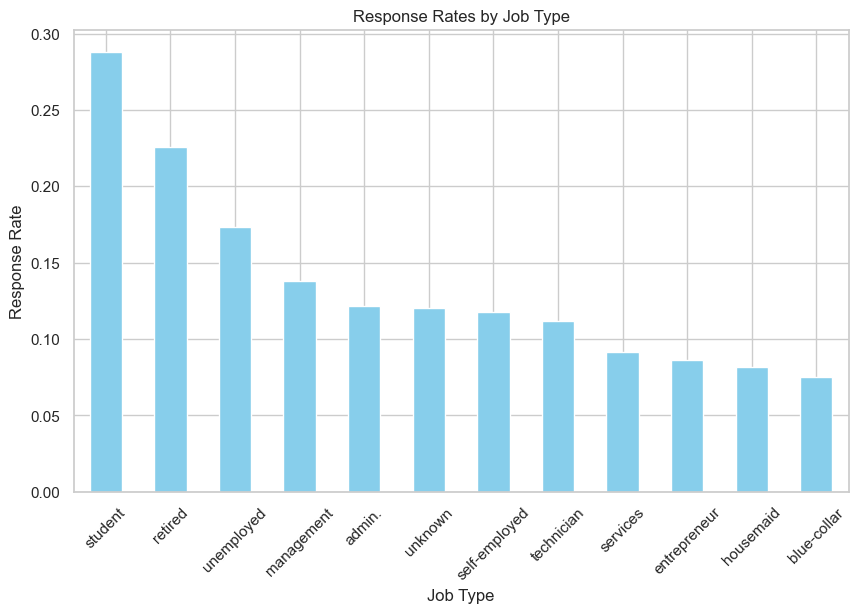

In [18]:
# Job Type vs Response Rate
plt.figure(figsize=(10, 6))
job_response = train.groupby('job')['Target'].mean().sort_values(ascending=False)
job_response.plot(kind='bar', color='skyblue')
plt.title('Response Rates by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Response Rate')
plt.xticks(rotation=45)
plt.show()

##### Key Insights:
Highest Response Rate: Single individuals (~0.14) engage the most.

Moderate Response Rate: Divorced individuals (~0.12) respond slightly less.

Lowest Response Rate: Married individuals (~0.10) are less engaged.

##### Possible Reasons:
Singles might be more open to new opportunities or campaigns.
Married individuals may have less time or different priorities.
Divorcees fall somewhere in between.

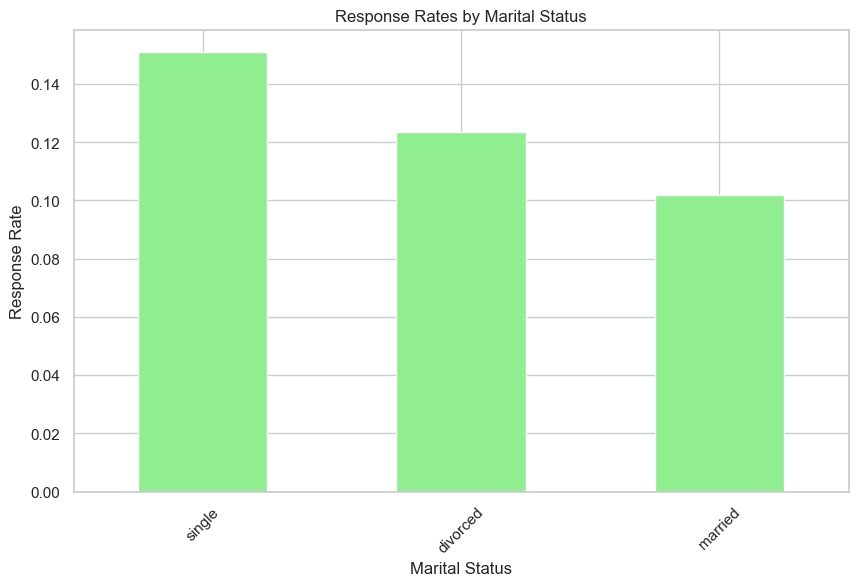

In [20]:
# Marital Status vs Response Rate
plt.figure(figsize=(10, 6))
marital_response = train.groupby('marital')['Target'].mean().sort_values(ascending=False)
marital_response.plot(kind='bar', color='lightgreen')
plt.title('Response Rates by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Response Rate')
plt.xticks(rotation=45)
plt.show()

##### Key Insights:
Highest Response Rate: Individuals with tertiary education are the most engaged.

Moderate Response: The "unknown" education group follows closely behind.

Lower Response: Those with secondary education respond less.

Lowest Engagement: Individuals with primary education have the least interaction.

##### Possible Explanations:
Higher education might indicate more interest or awareness of the topic.

Primary education group may have limited access or exposure to the campaign.

The "unknown" category could consist of mixed demographics.

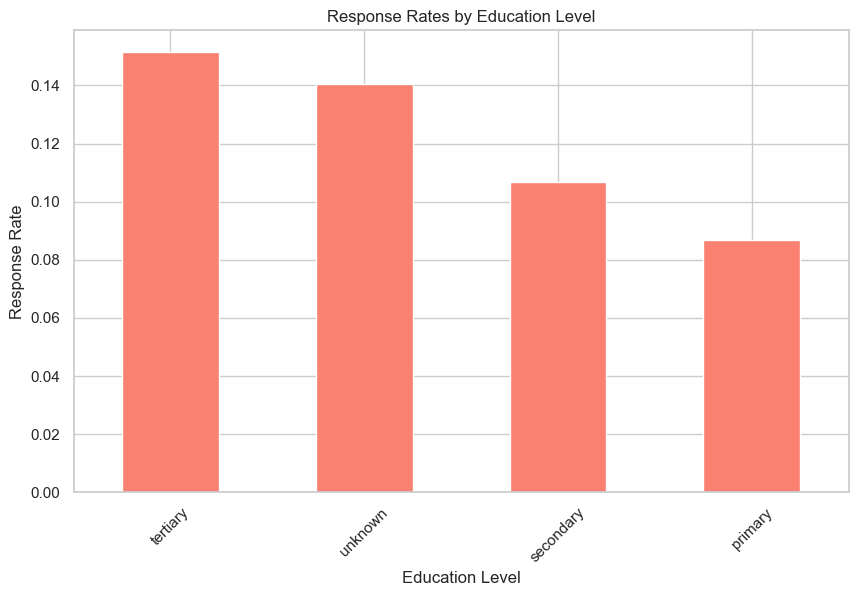

In [22]:
plt.figure(figsize=(10, 6))
education_response = train.groupby('education')['Target'].mean().sort_values(ascending=False)
education_response.plot(kind='bar', color='salmon')
plt.title('Response Rates by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Response Rate')
plt.xticks(rotation=45)
plt.show()

##### Key Insights:
Highest Response Rate: Individuals previously marked as "success" engage at ~65%, indicating strong retention.

Moderate Response: The "other" group shows ~15% engagement.

Lower Response: Prior "failure" outcomes resulted in only ~10% response.

Lowest Engagement: The "unknown" category had ~5% response, suggesting a lack of prior meaningful interaction.

##### Takeaways:
Successful past interactions create strong future engagement.

Failed or unknown outcomes may require more targeted outreach strategies.

Personalized marketing could improve engagement for past failures.

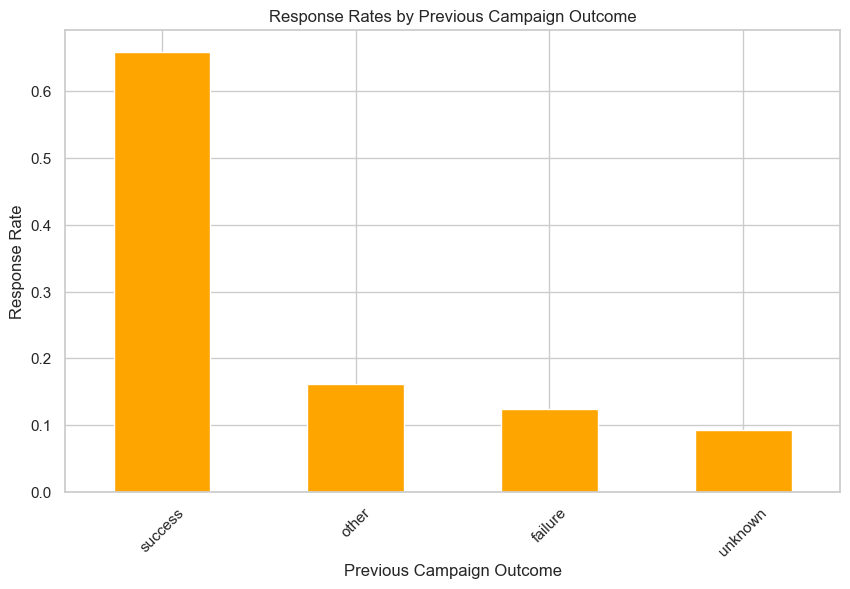

In [24]:
# 2. Previous Campaign Interactions
# Previous Campaign Outcome vs Response Rate
plt.figure(figsize=(10, 6))
previous_response = train.groupby('poutcome')['Target'].mean().sort_values(ascending=False)
previous_response.plot(kind='bar', color='orange')
plt.title('Response Rates by Previous Campaign Outcome')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Response Rate')
plt.xticks(rotation=45)
plt.show()

##### Key Insights:
Cellular Contact: The highest response rate (~0.14), making it the most effective method.

Telephone Contact: Moderate response (~0.12), slightly less effective than cellular.

Unknown Method: The lowest response (~0.04), indicating poor engagement.

##### Takeaways:
Cellular outreach appears to be the best strategy for engagement.

Telephone communication still performs well but may need optimization.



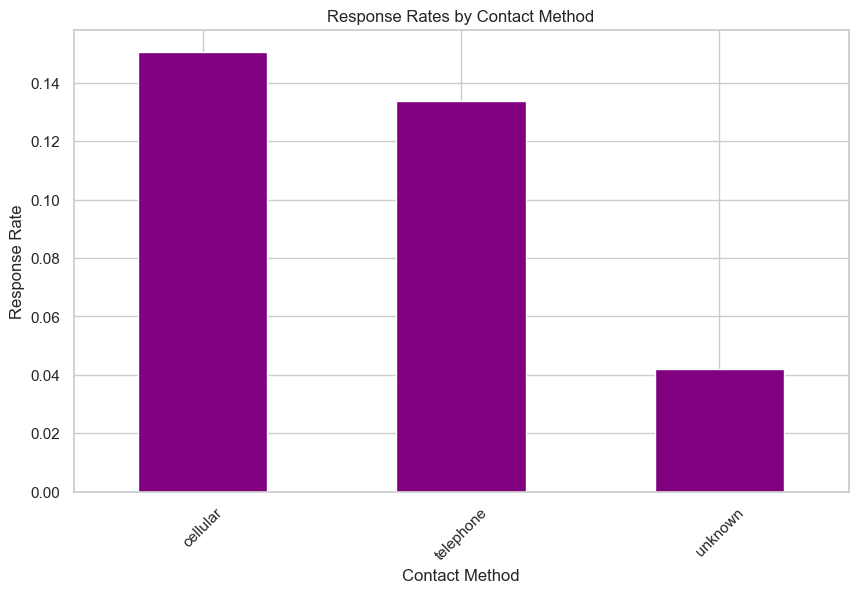

In [26]:
# 3. Communication Channels & Timing
# Contact Method vs Response Rate
plt.figure(figsize=(10, 6))
contact_response = train.groupby('contact')['Target'].mean().sort_values(ascending=False)
contact_response.plot(kind='bar', color='purple')
plt.title('Response Rates by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Response Rate')
plt.xticks(rotation=45)
plt.show()

##### Key Takeaways:
Highest Response Rate: March (~0.45), followed by December and September.

Moderate Response: October, April, and February show mid-level engagement.

Lowest Response: May (~0.05) has the least interaction.

##### Possible Explanations:
March's peak could be driven by seasonal trends or campaign timing.

December's engagement might relate to holiday-driven behavior.

May’s low response could indicate decreased consumer activity.

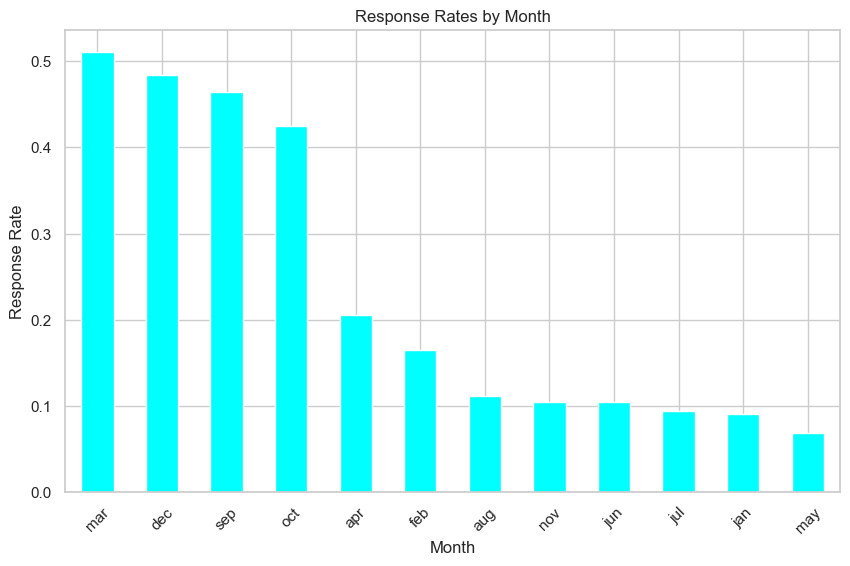

In [28]:
# Month vs Response Rate
plt.figure(figsize=(10, 6))
month_response = train.groupby('month')['Target'].mean().sort_values(ascending=False)
month_response.plot(kind='bar', color='cyan')
plt.title('Response Rates by Month')
plt.xlabel('Month')
plt.ylabel('Response Rate')
plt.xticks(rotation=45)
plt.show()

##### Key Takeaways:
Similar median account balance for both groups.

Wide distribution in both categories, indicating varied financial profiles.

Outliers present in both, suggesting some extreme cases.

##### Possible Insights:
Account balance alone may not strongly predict deposit subscriptions

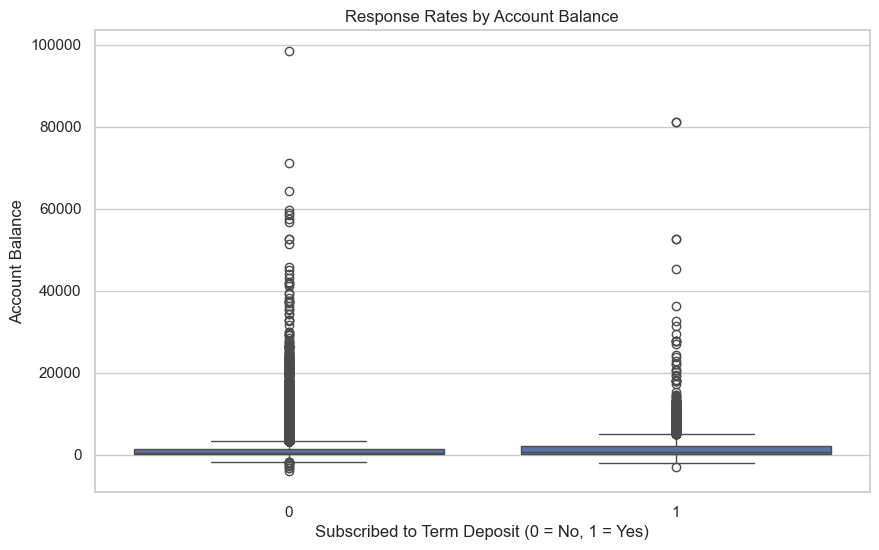

In [30]:
# 4. Financial & Economic Indicators
# Balance vs Response Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='balance', data=train)
plt.title('Response Rates by Account Balance')
plt.xlabel('Subscribed to Term Deposit (0 = No, 1 = Yes)')
plt.ylabel('Account Balance')
plt.show()

##### Key Observations:
Higher Response Rate: Individuals without loans (~0.12) engaged more.

Lower Response Rate: Those with loans (~0.06) responded less.

##### Possible Explanations:
People without loans may feel financially freer to engage.

Loan holders might be more cautious or less interested in financial offers.

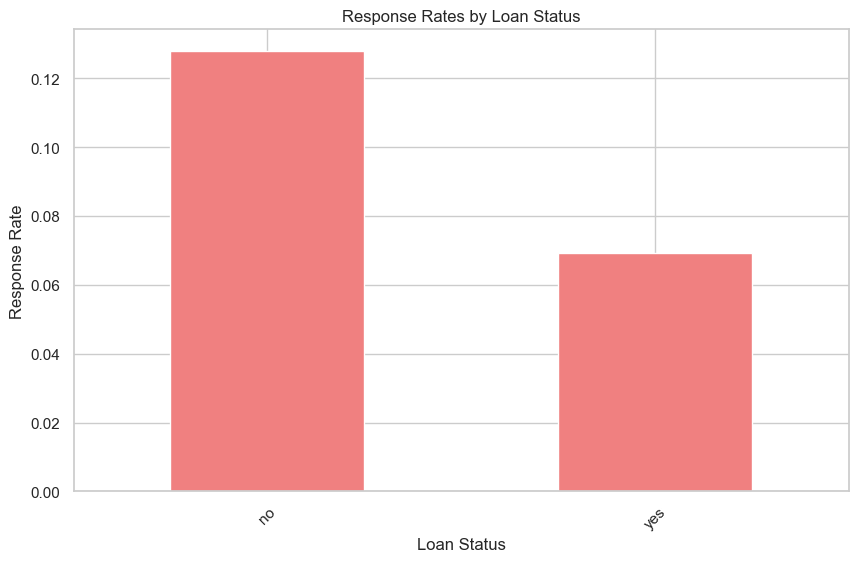

In [32]:
# Loan Status vs Response Rate
plt.figure(figsize=(10, 6))
loan_response = train.groupby('loan')['Target'].mean().sort_values(ascending=False)
loan_response.plot(kind='bar', color='lightcoral')
plt.title('Response Rates by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Response Rate')
plt.xticks(rotation=45)
plt.show()

##### Key Takeaways:
Higher Response Rate: Individuals without housing loans (~0.16) responded more actively.

Lower Response Rate: Those with housing loans (~0.08) engaged less.

##### Possible Explanations:
Financial flexibility: People without loans may feel more confident in financial decisions.

Loan holders might be more cautious about new financial commitments.

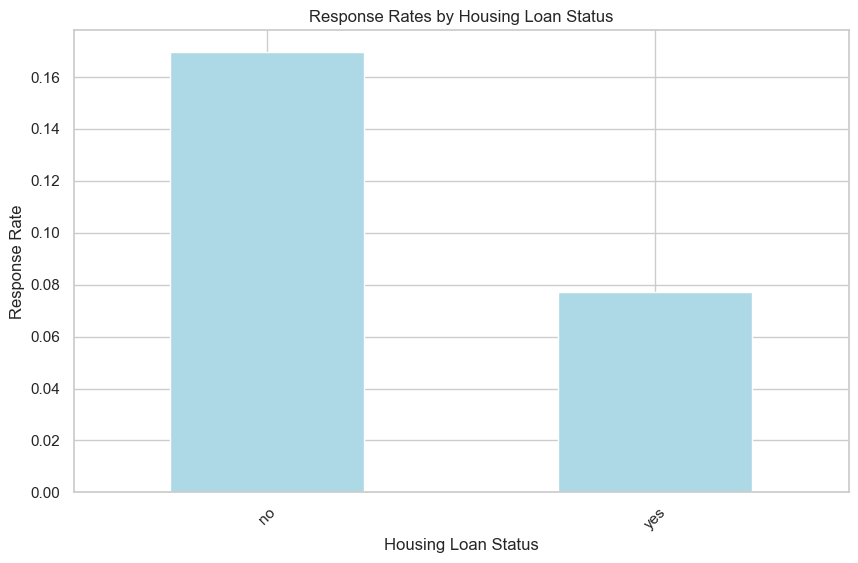

In [34]:
# Housing Loan Status vs Response Rate
plt.figure(figsize=(10, 6))
housing_response = train.groupby('housing')['Target'].mean().sort_values(ascending=False)
housing_response.plot(kind='bar', color='lightblue')
plt.title('Response Rates by Housing Loan Status')
plt.xlabel('Housing Loan Status')
plt.ylabel('Response Rate')
plt.xticks(rotation=45)
plt.show()

## Encoding the Catrgorical Features

In [37]:
# Preprocess the month column
month_dict = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
              'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
              'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
train['month'] = train['month'].map(month_dict)
test['month'] = test['month'].map(month_dict)

# Function for ordinal encoding of education
def ordinal(education):
    if education == 'unknown':
        return 0
    elif education == 'primary':
        return 1
    elif education == 'secondary':
        return 2
    else:
        return 3

# Apply ordinal encoding to the education column
train['education'] = train['education'].apply(ordinal)
test['education'] = test['education'].apply(ordinal)

# Encode categorical variables using one-hot encoding
train = pd.get_dummies(train, columns=['job', 'marital', 'default', 
                                        'housing', 'loan', 'contact', 
                                        'poutcome'], drop_first=True)
test = pd.get_dummies(test, columns=['job', 'marital', 'default', 
                                      'housing', 'loan', 'contact', 
                                      'poutcome'], drop_first=True)

# Align the train and test datasets to ensure they have the same columns
train, test = train.align(test, join='left', axis=1, fill_value=0)

In [39]:
# Define features and target variable
X = train.drop(columns=['id', 'Target'])
y = train['Target']

# Handle class imbalance by oversampling the minority class
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

# Apply feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [41]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=25, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(probability=True),
}

In [43]:
# Function to evaluate modelsw
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_val_prob = model.predict_proba(X_val)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    report = classification_report(y_val, y_val_pred, output_dict=True)
    f1 = report['1']['f1-score']
    precision = report['1']['precision']
    recall = report['1']['recall']
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_val_prob)
    roc_auc = auc(fpr, tpr)
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    
    return f1, accuracy, precision, recall, roc_auc, cm, y_train_pred, y_val_pred


In [45]:
# Store results
results = []
roc_curves = {}

# Evaluate each model
for name, model in models.items():
    f1, accuracy, precision, recall, roc_auc, cm, y_train_pred, y_val_pred = evaluate_model(model, X_train, y_train, X_val, y_val)
    fpr, tpr, _ = roc_curve(y_val, y_val_pred)
    results.append({
        "Model": name,
        "F1 Score": f1,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "ROC AUC": roc_auc,
        "Confusion Matrix": cm,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Val Accuracy": accuracy
    })
    roc_curves[name] = (fpr, tpr)



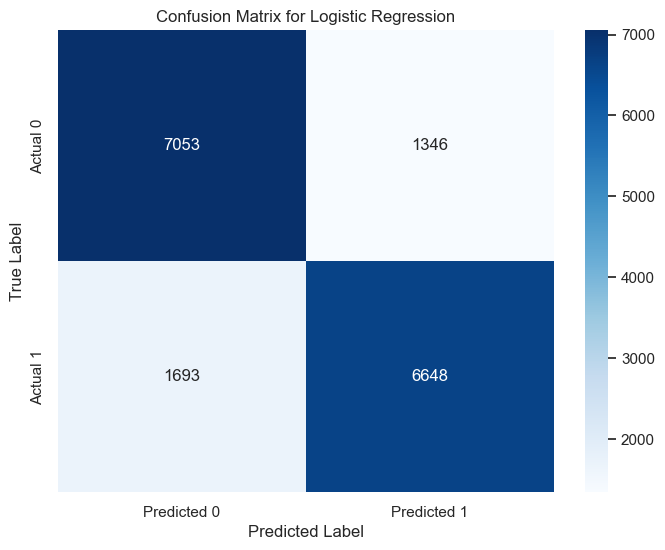

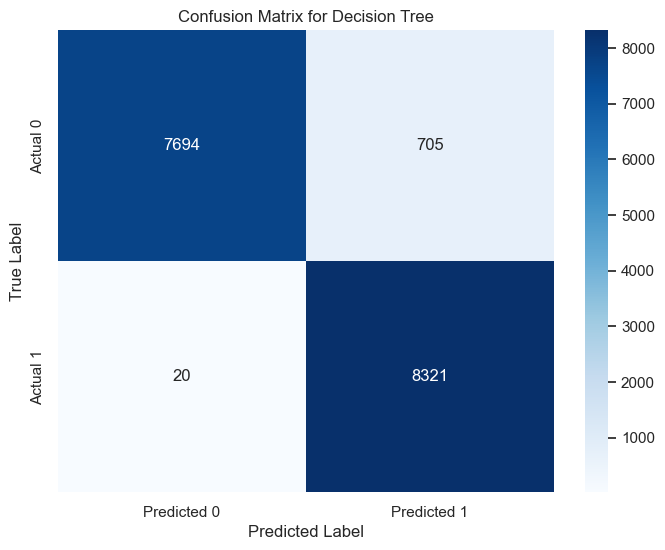

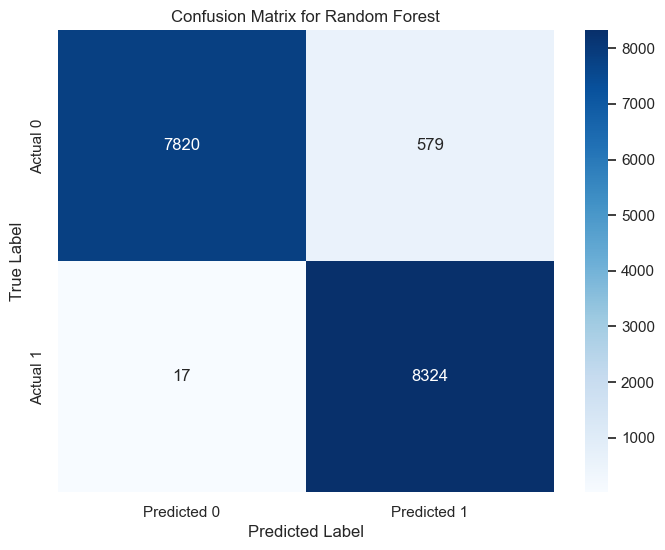

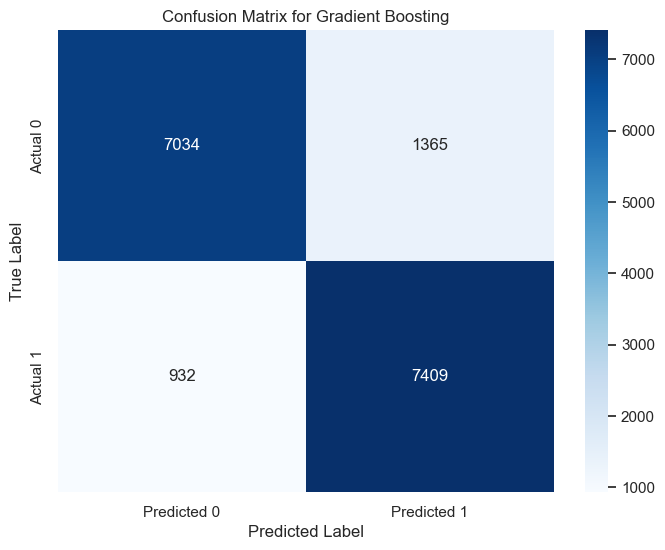

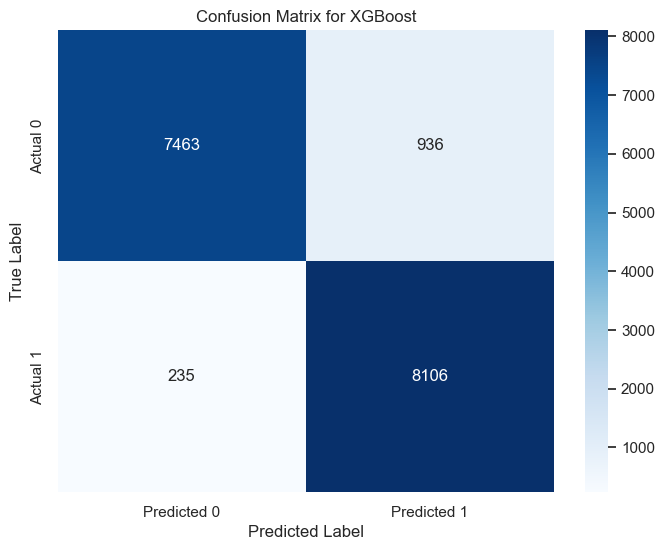

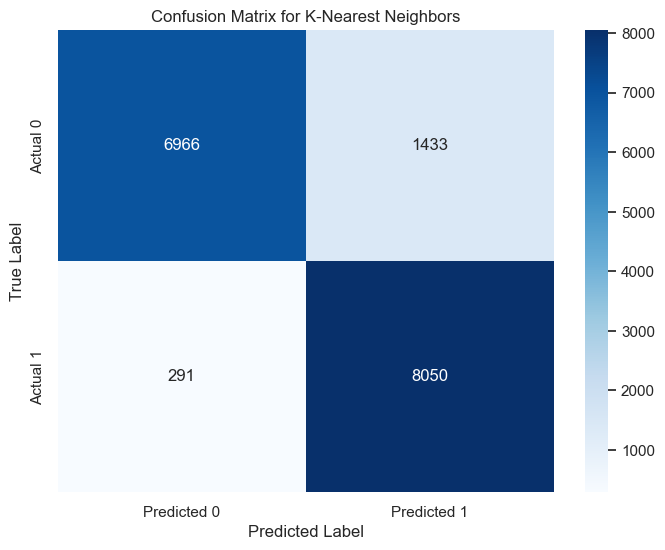

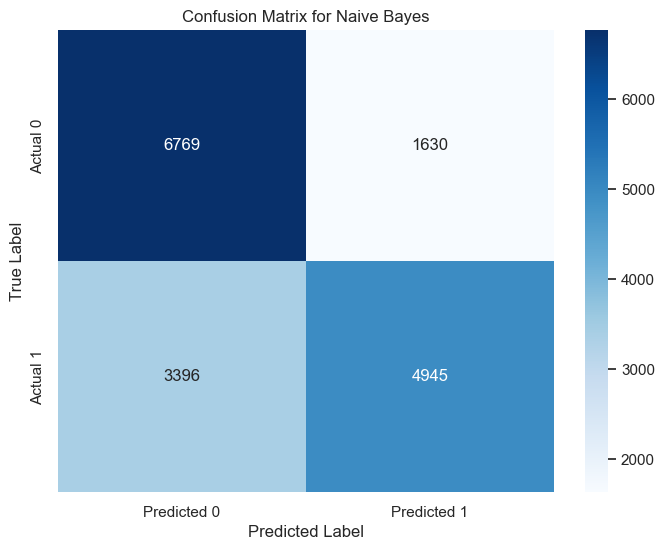

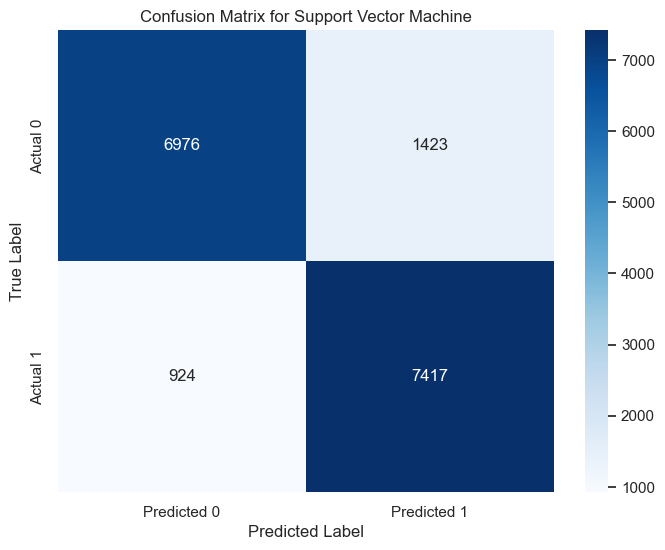

In [120]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print confusion matrices with color
for result in results:
    cm = result['Confusion Matrix']
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for {result["Model"]}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
# Plotting the metrics
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC']
metrics_df = results_df.set_index('Model')[metrics]

In [124]:
for name, model in models.items():
    y_val_pred = model.predict(X_val)
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_val, y_val_pred))
    print("-" * 50)

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      8399
           1       0.83      0.80      0.81      8341

    accuracy                           0.82     16740
   macro avg       0.82      0.82      0.82     16740
weighted avg       0.82      0.82      0.82     16740

--------------------------------------------------
Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      8399
           1       0.92      1.00      0.96      8341

    accuracy                           0.96     16740
   macro avg       0.96      0.96      0.96     16740
weighted avg       0.96      0.96      0.96     16740

--------------------------------------------------
Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      8399
   

<Figure size 1200x800 with 0 Axes>

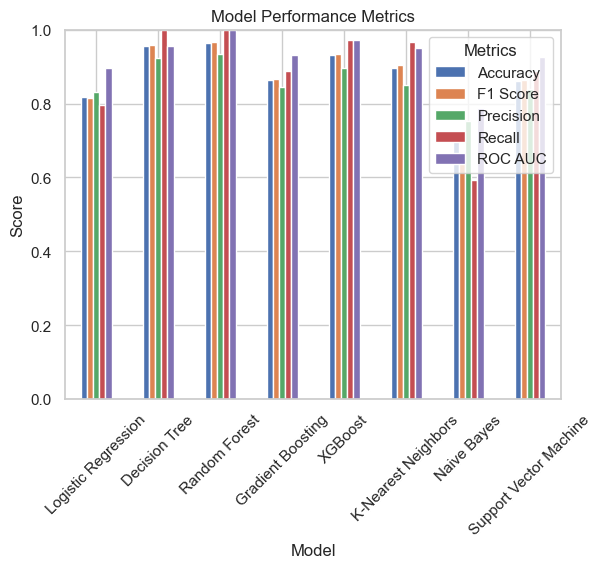

In [129]:
# Plotting
plt.figure(figsize=(12, 8))
metrics_df.plot(kind='bar')
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(title='Metrics')
plt.show()

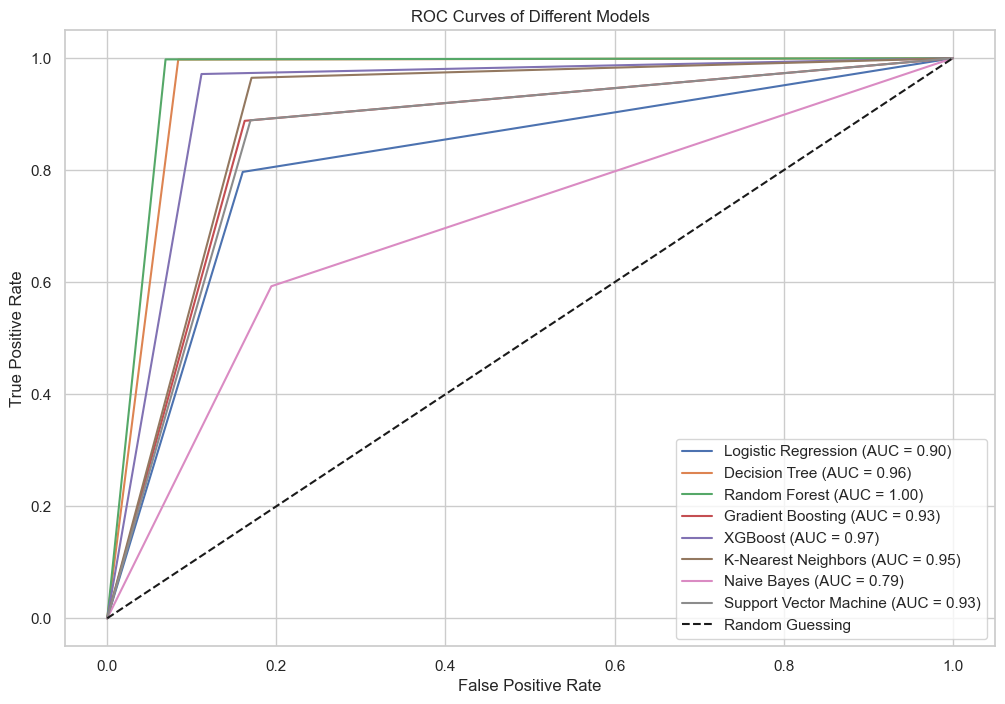

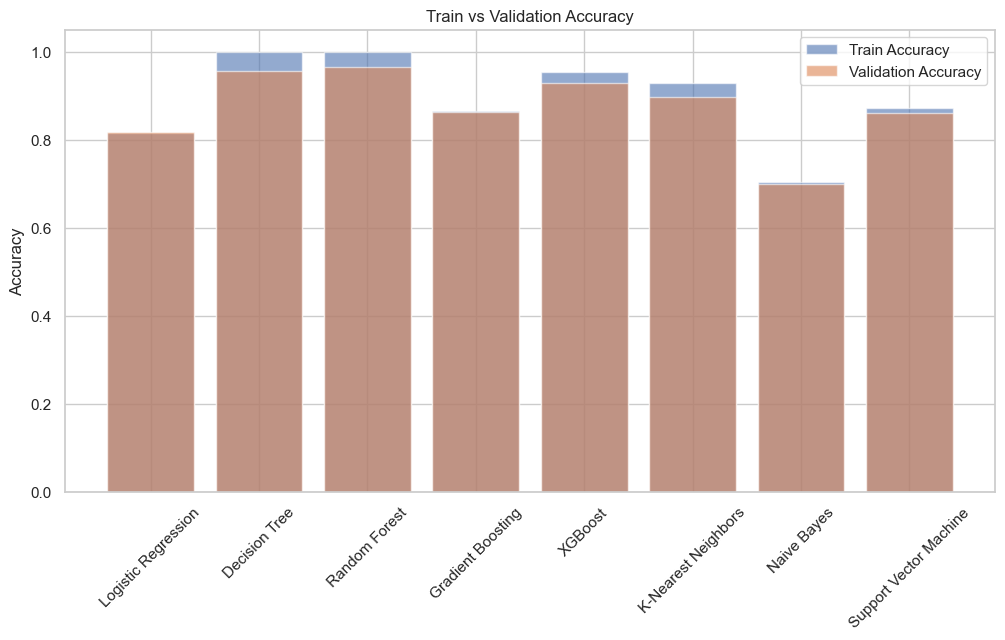

Logistic Regression is performing well: Train Accuracy = 0.82, Val Accuracy = 0.82
Decision Tree is performing well: Train Accuracy = 1.00, Val Accuracy = 0.96
Random Forest is performing well: Train Accuracy = 1.00, Val Accuracy = 0.96
Gradient Boosting is performing well: Train Accuracy = 0.86, Val Accuracy = 0.86
XGBoost is performing well: Train Accuracy = 0.95, Val Accuracy = 0.93
K-Nearest Neighbors is performing well: Train Accuracy = 0.93, Val Accuracy = 0.90
Naive Bayes is performing well: Train Accuracy = 0.70, Val Accuracy = 0.70
Support Vector Machine is performing well: Train Accuracy = 0.87, Val Accuracy = 0.86


In [131]:
# Plot ROC Curves
plt.figure(figsize=(12, 8))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results_df[results_df["Model"] == name]["ROC AUC"].values[0]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.title('ROC Curves of Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Check for overfitting
plt.figure(figsize=(12, 6))
plt.bar(results_df['Model'], results_df['Train Accuracy'], label='Train Accuracy', alpha=0.6)
plt.bar(results_df['Model'], results_df['Val Accuracy'], label='Validation Accuracy', alpha=0.6)
plt.title('Train vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Analyzing overfitting
for result in results:
    if result['Train Accuracy'] - result['Val Accuracy'] > 0.1:  # Threshold for overfitting
        print(f"{result['Model']} may be overfitting: Train Accuracy = {result['Train Accuracy']:.2f}, Val Accuracy = {result['Val Accuracy']:.2f}")
    else:
        print(f"{result['Model']} is performing well: Train Accuracy = {result['Train Accuracy']:.2f}, Val Accuracy = {result['Val Accuracy']:.2f}")

In [112]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=300, max_depth=25, random_state=35)

rf_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = rf_model.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      8399
           1       0.94      1.00      0.97      8341

    accuracy                           0.97     16740
   macro avg       0.97      0.97      0.97     16740
weighted avg       0.97      0.97      0.97     16740



In [113]:
# Prepare test data
X_test = test.drop(columns=['id', 'Target'], errors='ignore')
X_test = scaler.transform(X_test)  # Apply the same scaling to test data

# Make predictions on the test data
test_predictions = rf_model.predict(X_test)

# Create the submission DataFrame
submission = pd.DataFrame({
    'id': test['id'],
    'Target': test_predictions
})

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)
print("Predictions saved to submission.csv")

Predictions saved to submission.csv
